In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape # Dataset has 891 rows and 12 columns

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# age and cabin column have null values

In [9]:
df.duplicated().sum()

0

In [10]:
# no duplicate value is found

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df["PassengerId"].value_counts()

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


- The dataset contains 891 records.

- The average age of passengers is 29, with the maximum age being 80 years.

- **The average fare is 32, which is significantly higher than the median fare of 14 — indicating that a few passengers paid very high fares, which pulled the mean upward.**


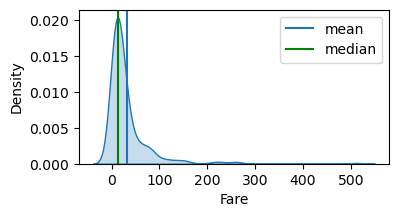

In [17]:
figure  = plt.figure(figsize=(4,2)) 

sns.kdeplot(x = df["Fare"], fill=True)
plt.axvline(np.mean(df["Fare"]), label="mean")
plt.axvline(np.median(df["Fare"]), label="median", color = "g")
plt.legend()

In [18]:
# How many males and females were there?
print("Male and Female Counts")
df["Sex"].value_counts()

Male and Female Counts


Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
# How many survived vs not survive?
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

 - Out of 891 passengers, only 342 survived, while the remaining 549 did not survive.

In [20]:
# Average age of passengers?
print("Average age of passenger:",np.mean(df["Age"]))

Average age of passenger: 29.69911764705882


In [21]:
# How many passengers have missing Age?
df["Age"].isnull().sum()

177

 - The dataset contains 177 missing age values out of 891 total passengers.

In [22]:
# Survival rate of men vs women?
survival_rate  = df.groupby("Sex")["Survived"].mean()
survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

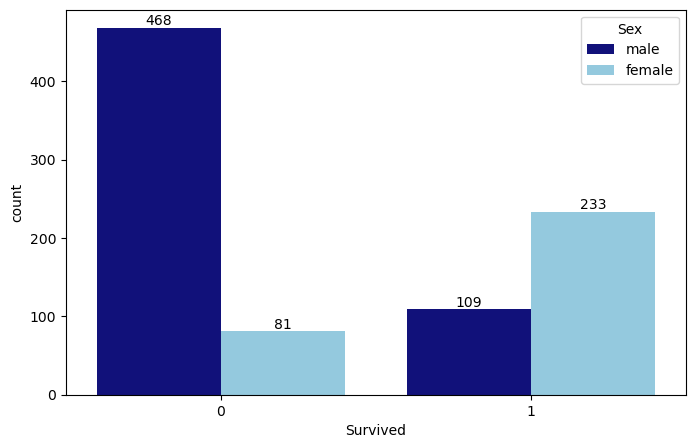

In [24]:
figure  = plt.figure(figsize=(8,5)) 
palette = ["darkblue","skyblue"]
ax = sns.countplot(x = "Survived", data=df, hue="Sex",palette=palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

 - Out of 314 female passengers, 233 survived, which is even higher than the number of surviving male passengers.

In [25]:
# Compare average fare by class (Pclass)
average_fare_by_class = df.groupby("Pclass")["Fare"].mean()
print("average fare by:",average_fare_by_class)

average fare by: Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


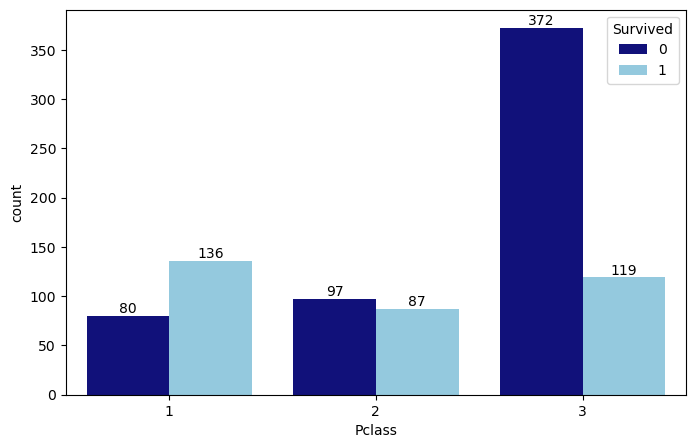

In [26]:
figure  = plt.figure(figsize=(8,5)) 
palette = {0: "darkblue", 1: "skyblue"}
ax = sns.countplot(x = "Pclass", data=df, hue = "Survived",palette=palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**The average fare by class is as follows:**

1st Class: 84.15

2nd Class: 20.66

3rd Class: 13.68

**The fare for 3rd class is significantly lower compared to the other two classes, which likely explains why most passengers traveled in 3rd class.**



In [27]:
#survival rate by passenger class?
sr = df.groupby("Pclass")["Survived"].mean()
print("survival rate by passenger class:",sr)

survival rate by passenger class: Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


- The survival rate was highest among 1st class passengers, while the majority of deaths occurred in 3rd class.
- This suggests that passenger class had a significant impact on survival chances.

In [28]:
#the average age of survivors vs non-survivors?
avg_age = df.groupby("Survived")["Age"].mean()
avg_age

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

- The average age of survivors is 28, while the average age of non-survivors is 30.

In [59]:
# Did children (Age < 16) survive more than adults?

In [29]:
df["IsChhild"]= df["Age"]<16

In [30]:
df["IsChhild"].value_counts()

IsChhild
False    808
True      83
Name: count, dtype: int64

In [31]:
IsChhild = df.groupby("Survived")["IsChhild"].sum()
IsChhild

Survived
0    34
1    49
Name: IsChhild, dtype: int64

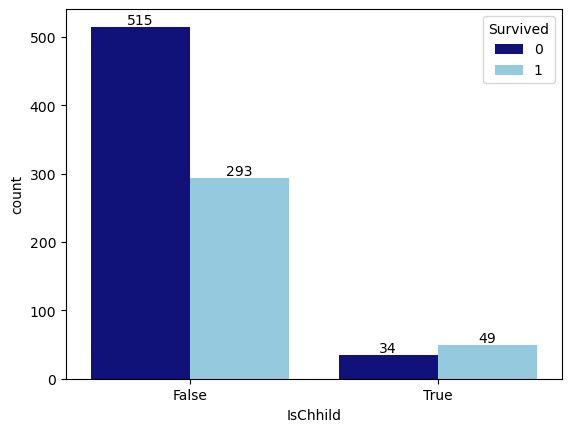

In [32]:
palette = ["darkblue","skyblue"]

ax = sns.countplot(x = "IsChhild", data = df, hue = "Survived",palette=palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

- There were a total of 84 children (under the age of 16), out of which 49 survived and the remaining 34 did not.

In [33]:
# Which port did most passengers embark from?
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [34]:
# Which combinations had highest survival: Gender + Class?
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

**🧾 Key Takeaways**

- Survival was heavily influenced by gender, class, and to a lesser extent, age.

- Females and 1st class passengers had the highest survival chances.

- Children under 16 had better chances of survival than adults.

- 3rd class passengers paid the lowest fares but had the highest fatality rate.